In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline


In [3]:
#creating a pandas dataframe from the csv file 

data = pd.read_csv('weather.csv')

In [4]:
data.shape

(1587257, 13)

In [5]:
#preview

data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [6]:
#every 10th data is sampled as there are a lot of data

sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [7]:
#preview

sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,0.0,0.0,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,0.0,0.0,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,0.0,0.0,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,0.0,0.0,57.4


In [8]:
#stats

sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [9]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [10]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [11]:
#Dropping all the columns with empty rain_duration and rain_accumilation

del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [12]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [13]:
#total rows droped
rows_before - rows_after

46

In [14]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [15]:
sampled_df.shape

(158680, 11)

In [16]:
#features required for clustering

features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [17]:
select_df = sampled_df[features]

In [18]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [19]:
select_df.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4


In [20]:
#scale the features using StandardScaler

X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [21]:
#using k means 

kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=12)


In [22]:
#centres for k means

centers = model.cluster_centers_
centers

array([[ 0.27036359, -0.99388722,  0.66472563, -0.54540177,  0.85617841,
        -0.52765979,  1.1522833 ],
       [-0.21259024,  0.63022652,  0.4082769 ,  0.73452672,  0.51641303,
         0.6726254 , -0.14943921],
       [-0.16451203,  0.86399949, -1.31117743, -0.58956469, -1.16702537,
        -0.60487726, -0.64085029],
       [ 1.36662578, -0.08098863, -1.20658684, -0.05314336, -1.07521639,
        -0.0330038 , -0.97733847],
       [ 1.19037347, -0.25470785, -1.15495401,  2.12110564, -1.05331348,
         2.23805523, -1.13427071],
       [-0.70138895,  0.53373582,  0.17513713, -0.58666936,  0.34513541,
        -0.60006838, -0.1082934 ],
       [-1.17509877, -0.87923048,  0.44598562,  1.97005995,  0.53812796,
         1.93118836,  0.91818649],
       [ 0.23435343,  0.32056122,  1.88796075, -0.65180042, -1.55173027,
        -0.57664397, -0.28384183],
       [ 0.06152558, -0.78905044, -1.19687419, -0.57028943, -1.04278482,
        -0.5847456 ,  0.87834289],
       [ 0.13043102,  0.8429

In [23]:
#utility functions for plots
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [24]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')



In [25]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.270364,-0.993887,0.664726,-0.545402,0.856178,-0.527660,1.152283,0
1,-0.212590,0.630227,0.408277,0.734527,0.516413,0.672625,-0.149439,1
2,-0.164512,0.863999,-1.311177,-0.589565,-1.167025,-0.604877,-0.640850,2
3,1.366626,-0.080989,-1.206587,-0.053143,-1.075216,-0.033004,-0.977338,3
4,1.190373,-0.254708,-1.154954,2.121106,-1.053313,2.238055,-1.134271,4
5,-0.701389,0.533736,0.175137,-0.586669,0.345135,-0.600068,-0.108293,5
6,-1.175099,-0.879230,0.445986,1.970060,0.538128,1.931188,0.918186,6
7,0.234353,0.320561,1.887961,-0.651800,-1.551730,-0.576644,-0.283842,7
8,0.061526,-0.789050,-1.196874,-0.570289,-1.042785,-0.584746,0.878343,8
9,0.130431,0.842902,1.413143,-0.638358,1.677057,-0.589209,-0.714910,9


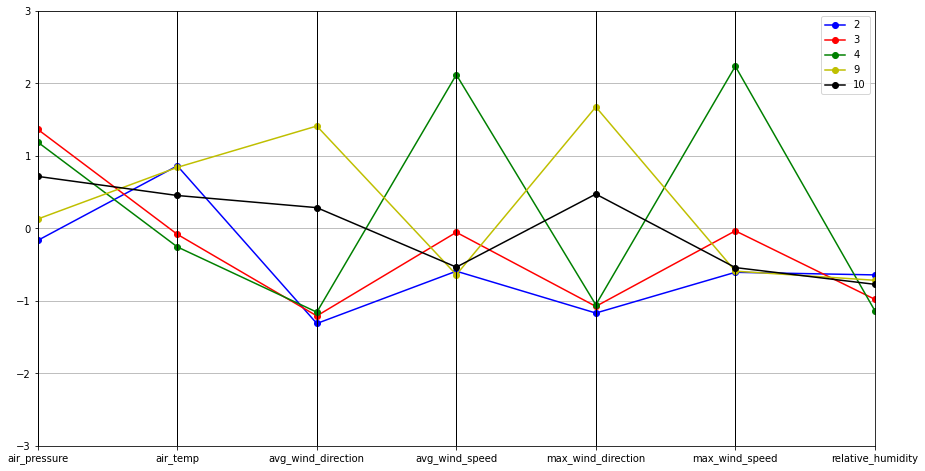

In [26]:
#dry days

parallel_plot(P[P['relative_humidity'] < -0.5])

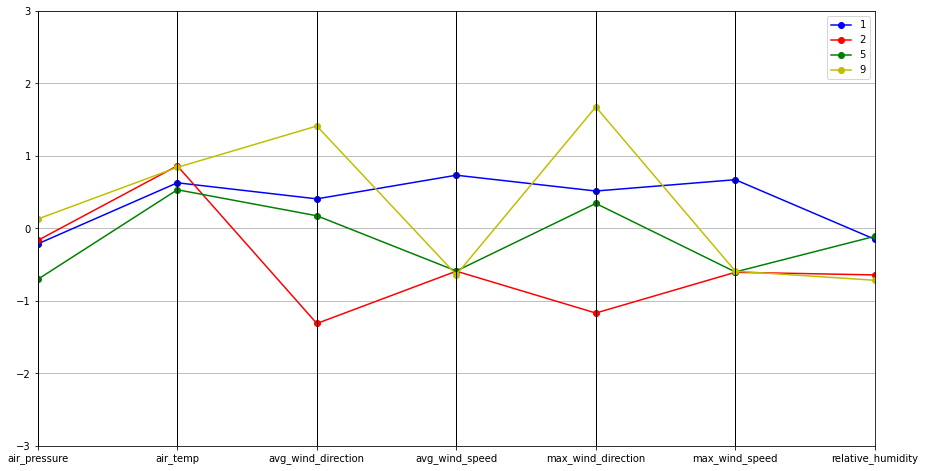

In [27]:
#warm days

parallel_plot(P[P['air_temp'] > 0.5])

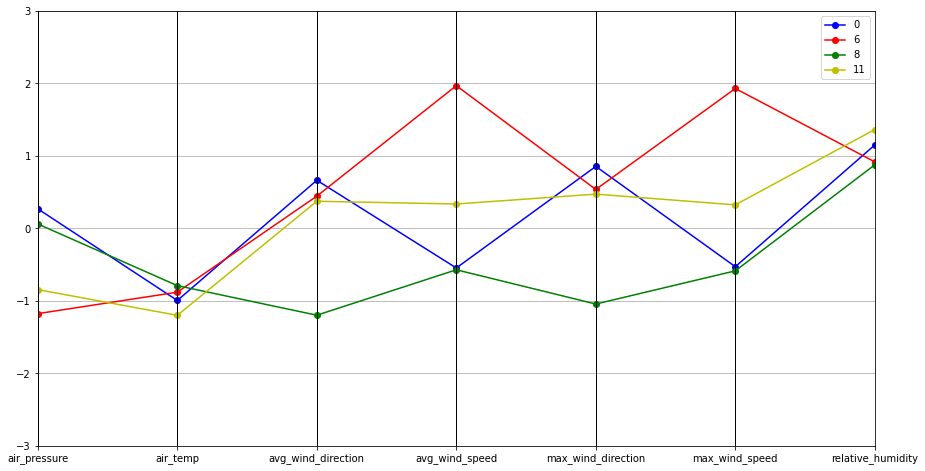

In [28]:
#cool days

parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])